In [1]:
import re
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
root_dir = '../script/outputs/'

In [3]:
with open(f'{root_dir}/resumo.txt') as f:
    resumo = f.readlines()

In [4]:
bdm_19 = []
bdm_1918 = []
bdm_191817 = []
bdm_19181716 = []

for line in resumo:
    line = line.strip()
    file = line.split()[-1]
    if re.match( r'bdm19\b', line):
        bdm_19.append(f'output_{file}.csv')
    if re.match( r'bdm1918\b', line):
        bdm_1918.append(f'output_{file}.csv')
    if re.match( r'bdm191817\b', line):
        bdm_191817.append(f'output_{file}.csv')
    if re.match( r'bdm19181716\b', line):
        bdm_19181716.append(f'output_{file}.csv')

bdm_dict = {
    5: bdm_19,
    10: bdm_1918,
    17: bdm_191817,
    26: bdm_19181716,
}

In [5]:
bdm_dict

{5: ['output_aa842107-5bd6-469e-b32f-155d4e1043c5.csv',
  'output_061baed9-653c-44b2-9a53-5f469e28be6e.csv',
  'output_f718566a-919c-43d4-a669-de304b71003e.csv',
  'output_e1fea622-49b5-4eed-9b38-2458f47dcca7.csv'],
 10: ['output_74a7296e-ec1f-4a33-a171-19e9f8717298.csv',
  'output_58e827ac-e288-4f55-9814-e183cee911f3.csv',
  'output_b0c93b68-2cbd-42b3-8a4d-aa61875584bf.csv',
  'output_24fd40c6-bbff-4ecb-9a31-cd5a05ba9f4a.csv'],
 17: ['output_9abce30d-0f03-4c6d-887a-f6e7d00b985d.csv',
  'output_6cf766f7-25c3-427e-98d6-a028a45f6686.csv',
  'output_d569193e-b3bf-46eb-bcf0-bc05690cdb89.csv',
  'output_28800781-8916-4909-96b2-95c9f3aebd84.csv'],
 26: ['output_9461042f-de2d-4603-b647-f21ffdc0c888.csv',
  'output_8373db94-8c65-4b4c-bf8f-be27c55893e9.csv',
  'output_71f77f59-8e3e-4e5c-a9c8-20dd3939343d.csv',
  'output_ecfa53e6-86c1-4eaa-8a6d-9bdbec4565d6.csv']}

In [6]:
nos_dict = {}

for dir_ in os.listdir(root_dir):
    if dir_ != 'resumo.txt':
        csv_list = []
        for file in os.listdir(os.path.join(root_dir, dir_)):
            if not file.endswith('.log'):
                csv_list.append(file)
        nos_dict[dir_] = csv_list

In [7]:
ordem = ['3_nos', '4_nos', '5_nos', '6_nos']
nos_dict = {k: nos_dict[k] for k in ordem}

In [8]:
nos_dict

{'3_nos': ['output_9abce30d-0f03-4c6d-887a-f6e7d00b985d.csv',
  'output_74a7296e-ec1f-4a33-a171-19e9f8717298.csv',
  'output_aa842107-5bd6-469e-b32f-155d4e1043c5.csv',
  'output_9461042f-de2d-4603-b647-f21ffdc0c888.csv'],
 '4_nos': ['output_58e827ac-e288-4f55-9814-e183cee911f3.csv',
  'output_6cf766f7-25c3-427e-98d6-a028a45f6686.csv',
  'output_8373db94-8c65-4b4c-bf8f-be27c55893e9.csv',
  'output_061baed9-653c-44b2-9a53-5f469e28be6e.csv'],
 '5_nos': ['output_b0c93b68-2cbd-42b3-8a4d-aa61875584bf.csv',
  'output_d569193e-b3bf-46eb-bcf0-bc05690cdb89.csv',
  'output_f718566a-919c-43d4-a669-de304b71003e.csv',
  'output_71f77f59-8e3e-4e5c-a9c8-20dd3939343d.csv'],
 '6_nos': ['output_28800781-8916-4909-96b2-95c9f3aebd84.csv',
  'output_24fd40c6-bbff-4ecb-9a31-cd5a05ba9f4a.csv',
  'output_ecfa53e6-86c1-4eaa-8a6d-9bdbec4565d6.csv',
  'output_e1fea622-49b5-4eed-9b38-2458f47dcca7.csv']}

# Geração df completo

In [9]:
df_final = pd.DataFrame()
for k, v in nos_dict.items():
    for file in v:
        folderpath = os.path.join(root_dir, k)
        filepath = os.path.join(folderpath, file)
        
        df = pd.read_csv(filepath)
        df = df.drop(['Unnamed: 0'], axis=1)
        
        k_clean = k.replace('_', ' ')
        k_clean = k_clean.replace('o', 'ó')
        df['Número de nós'] = k_clean
        
        for bd, f in bdm_dict.items():
            if file in bdm_dict[bd]:
                df['Quantidade de dados'] = bd
        df_final = df_final.append(df)
df_final.reset_index(inplace=True)
df_final = df_final.drop(['index'], axis=1)

In [10]:
df_final

,execution_time,Número de nós,Quantidade de dados
0,0.003558,3 nós,17
1,0.002851,3 nós,17
2,0.003354,3 nós,17
3,0.002131,3 nós,17
4,0.001735,3 nós,17
...,...,...,...
159995,0.001690,6 nós,5
159996,0.003579,6 nós,5
159997,0.003910,6 nós,5
159998,0.002275,6 nós,5


In [11]:
df_final_sorted_qtd = df_final.sort_values(by='Quantidade de dados')
df_final_sorted_qtd

,execution_time,Número de nós,Quantidade de dados
79999,0.002014,4 nós,5
79992,0.002887,4 nós,5
79993,0.001969,4 nós,5
79994,0.002678,4 nós,5
79995,0.001810,4 nós,5
...,...,...,...
66661,0.001551,4 nós,26
66660,0.002836,4 nós,26
66659,0.002178,4 nós,26
66666,0.002095,4 nós,26


In [12]:
df_final_pivot = df_final.pivot_table(index="Quantidade de dados", columns="Número de nós", values="execution_time", aggfunc='sum')
df_final_pivot = df_final_pivot.reindex(bdm_dict.keys())

In [13]:
df_final_pivot

Número de nós,3 nós,4 nós,5 nós,6 nós
Quantidade de dados,,,,
5,17.470576,22.203969,23.231839,27.282543
10,18.084042,22.631163,24.147258,28.386322
17,18.810478,23.614516,25.156641,28.369833
26,18.082021,26.255942,27.126009,30.078961


# PLOT

In [14]:
n_queries = 10000

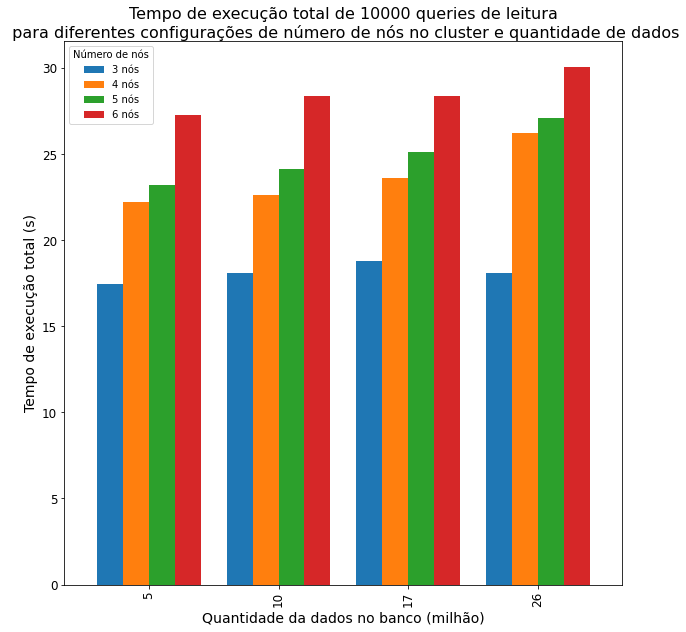

In [15]:
df_final_pivot.plot.bar(figsize=(10,10), width=0.8)

plt.title(f"Tempo de execução total de {n_queries} queries de leitura\n para diferentes configurações de número de nós no cluster e quantidade de dados",
          fontdict={'size': 16},
          wrap=True)

plt.xlabel('Quantidade da dados no banco (milhão)', 
           fontdict={'size': 14})
plt.ylabel('Tempo de execução total (s)', fontdict={'size': 14})

plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

plt.savefig(f'final_histplot.png', dpi=300)

plt.show()

In [16]:
df_final_sorted_qtd['execution_time_ms'] = df_final_sorted_qtd['execution_time'] * 1000
df_final_sorted_qtd

,execution_time,Número de nós,Quantidade de dados,execution_time_ms
79999,0.002014,4 nós,5,2.014160
79992,0.002887,4 nós,5,2.886772
79993,0.001969,4 nós,5,1.969337
79994,0.002678,4 nós,5,2.677679
79995,0.001810,4 nós,5,1.810312
...,...,...,...,...
66661,0.001551,4 nós,26,1.551390
66660,0.002836,4 nós,26,2.836227
66659,0.002178,4 nós,26,2.177715
66666,0.002095,4 nós,26,2.095222


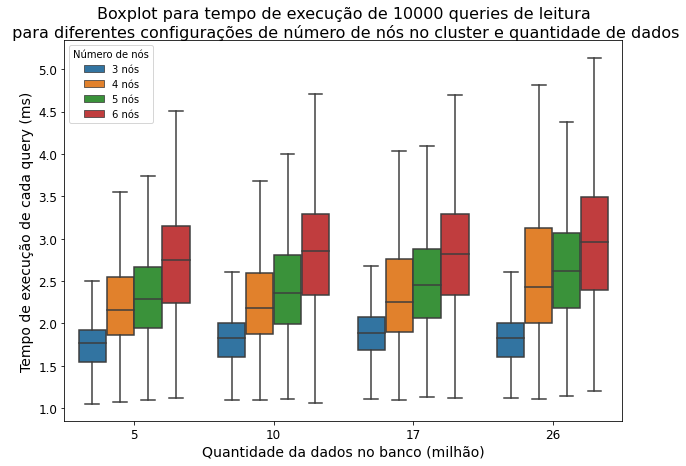

In [17]:
plt.figure(figsize=(10,7))
hue_order = df_final_pivot.columns
sns.boxplot(x='Quantidade de dados', y='execution_time_ms', hue='Número de nós', hue_order=hue_order, data=df_final_sorted_qtd, showfliers = False)

plt.title(f"Boxplot para tempo de execução de {n_queries} queries de leitura\n para diferentes configurações de número de nós no cluster e quantidade de dados",
          fontdict={'size': 16},
          wrap=True)

plt.xlabel('Quantidade da dados no banco (milhão)', 
           fontdict={'size': 14})
plt.ylabel('Tempo de execução de cada query (ms)', fontdict={'size': 14})

plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

plt.savefig(f'final_boxplot.png', dpi=300)

plt.show()

In [18]:
nos_dict

{'3_nos': ['output_9abce30d-0f03-4c6d-887a-f6e7d00b985d.csv',
  'output_74a7296e-ec1f-4a33-a171-19e9f8717298.csv',
  'output_aa842107-5bd6-469e-b32f-155d4e1043c5.csv',
  'output_9461042f-de2d-4603-b647-f21ffdc0c888.csv'],
 '4_nos': ['output_58e827ac-e288-4f55-9814-e183cee911f3.csv',
  'output_6cf766f7-25c3-427e-98d6-a028a45f6686.csv',
  'output_8373db94-8c65-4b4c-bf8f-be27c55893e9.csv',
  'output_061baed9-653c-44b2-9a53-5f469e28be6e.csv'],
 '5_nos': ['output_b0c93b68-2cbd-42b3-8a4d-aa61875584bf.csv',
  'output_d569193e-b3bf-46eb-bcf0-bc05690cdb89.csv',
  'output_f718566a-919c-43d4-a669-de304b71003e.csv',
  'output_71f77f59-8e3e-4e5c-a9c8-20dd3939343d.csv'],
 '6_nos': ['output_28800781-8916-4909-96b2-95c9f3aebd84.csv',
  'output_24fd40c6-bbff-4ecb-9a31-cd5a05ba9f4a.csv',
  'output_ecfa53e6-86c1-4eaa-8a6d-9bdbec4565d6.csv',
  'output_e1fea622-49b5-4eed-9b38-2458f47dcca7.csv']}

In [19]:
bdm_dict

{5: ['output_aa842107-5bd6-469e-b32f-155d4e1043c5.csv',
  'output_061baed9-653c-44b2-9a53-5f469e28be6e.csv',
  'output_f718566a-919c-43d4-a669-de304b71003e.csv',
  'output_e1fea622-49b5-4eed-9b38-2458f47dcca7.csv'],
 10: ['output_74a7296e-ec1f-4a33-a171-19e9f8717298.csv',
  'output_58e827ac-e288-4f55-9814-e183cee911f3.csv',
  'output_b0c93b68-2cbd-42b3-8a4d-aa61875584bf.csv',
  'output_24fd40c6-bbff-4ecb-9a31-cd5a05ba9f4a.csv'],
 17: ['output_9abce30d-0f03-4c6d-887a-f6e7d00b985d.csv',
  'output_6cf766f7-25c3-427e-98d6-a028a45f6686.csv',
  'output_d569193e-b3bf-46eb-bcf0-bc05690cdb89.csv',
  'output_28800781-8916-4909-96b2-95c9f3aebd84.csv'],
 26: ['output_9461042f-de2d-4603-b647-f21ffdc0c888.csv',
  'output_8373db94-8c65-4b4c-bf8f-be27c55893e9.csv',
  'output_71f77f59-8e3e-4e5c-a9c8-20dd3939343d.csv',
  'output_ecfa53e6-86c1-4eaa-8a6d-9bdbec4565d6.csv']}

In [20]:
df_list = []
for i, (k, v) in enumerate(nos_dict.items()):
    for file in v:
        folderpath = os.path.join(root_dir, k)
        filepath = os.path.join(folderpath, file)
        
        df = pd.read_csv(filepath)
        df = df.drop(['Unnamed: 0'], axis=1)
        
        k_clean = k.replace('_', ' ')
        k_clean = k_clean.replace('o', 'ó')
        df['Número de nós'] = k_clean        
        
        for bd, f in bdm_dict.items():
            if file in bdm_dict[bd]:
                df['Quantidade de dados'] = bd
#         df = df.sort_values(by='Quantidade de dados')
#         print(df)
        df_list.append((df, k_clean))    

In [21]:
df_list

[(      execution_time Número de nós  Quantidade de dados
  0           0.003558         3 nós                   17
  1           0.002851         3 nós                   17
  2           0.003354         3 nós                   17
  3           0.002131         3 nós                   17
  4           0.001735         3 nós                   17
  ...              ...           ...                  ...
  9995        0.002205         3 nós                   17
  9996        0.002110         3 nós                   17
  9997        0.001657         3 nós                   17
  9998        0.002220         3 nós                   17
  9999        0.002009         3 nós                   17
  
  [10000 rows x 3 columns],
  '3 nós'),
 (      execution_time Número de nós  Quantidade de dados
  0           0.002857         3 nós                   10
  1           0.003656         3 nós                   10
  2           0.002941         3 nós                   10
  3           0.002121       

# SINGULAR

In [112]:
df_x = df_final[(df_final['Número de nós'] == '3 nós') & (df_final['Quantidade de dados'] == 5)]

In [113]:
df_x.describe()

,execution_time,Quantidade de dados
count,10000.000000,10000.0
mean,0.001747,5.0
std,0.000386,0.0
min,0.001055,5.0
25%,0.001542,5.0
50%,0.001763,5.0
75%,0.001926,5.0
max,0.024907,5.0


In [114]:
tempo_x = df_x['execution_time'].median()
tempo_x

0.0017629861831664501

In [115]:
df_y = df_final[(df_final['Número de nós'] == '6 nós') & (df_final['Quantidade de dados'] == 26)]

In [118]:
df_y.describe()

,execution_time,Quantidade de dados
count,10000.000000,10000.0
mean,0.003008,26.0
std,0.000982,0.0
min,0.001200,26.0
25%,0.002397,26.0
50%,0.002955,26.0
75%,0.003494,26.0
max,0.031593,26.0


In [116]:
tempo_y = df_y['execution_time'].median()
tempo_y

0.00295507907867425

In [117]:
tempo_y / tempo_x

1.6761782405842316